In this notebook, we establish the simulation for standard Hohmman transfer (HT) model and the HT model when considering the gravity of other planets. We compare the difference between these two models in terms of spacecraft's velocity and position.

If you have any questions, please send emails to neptunego@126.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
from RK78 import *
from miscellaneous import *
plt.rc('font',family='Times New Roman')

In [2]:
#Hohmann transder model for Mars-Earth Transfer
delta_v1,delta_v2, t_transfer = hohmann(1,1.52,GM=1) 
x0 = (1*u.AU).to('km').value
soi_earth = 0.929e6 #radius of soi of earth, km
soi_mars = 0.578e6 #radius of soi of earth, km

In [3]:
initial = np.array([1.00,0.001,0,0,1.+delta_v1,0])

model_2body = {'model':model}
time, results = orbit(initial,period=t_transfer,h=np.pi/1000,**model_2body)

model_nbody = {'model':model_p}
time1, results1 = orbit(initial,period=t_transfer,h=np.pi/1000,**model_nbody)

Done!
Function returns the time and results sequences in type of python-list.
Remember to transfer them to ndarray and transpose the results!
1416
Done!
Function returns the time and results sequences in type of python-list.
Remember to transfer them to ndarray and transpose the results!
5659


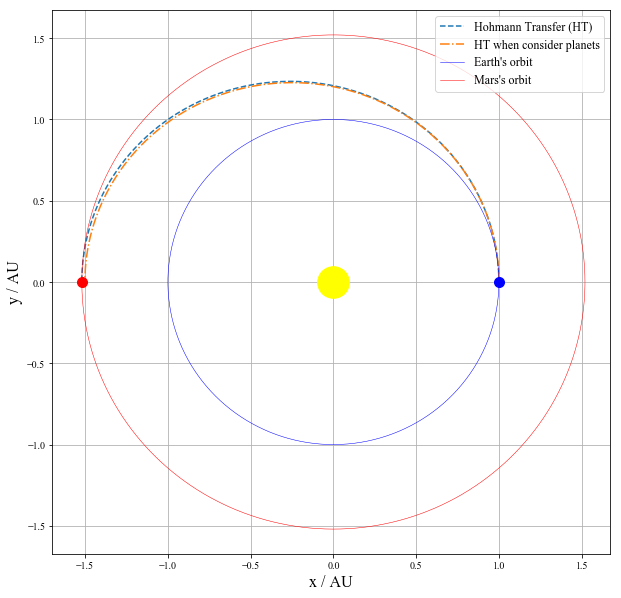

In [4]:
plt.figure(figsize=(10,10))

plt.plot(results[0][:],results[1][:],linewidth=1.5,linestyle='--',label='Hohmann Transfer (HT)')
plt.plot(results1[0][:],results1[1][:],linewidth=1.5,linestyle='-.',label='HT when consider planets')

plt.scatter(0,0,marker='o',c='yellow',s=1000,zorder=1000)
plt.scatter(1,0,marker='o',c='blue',s=100,zorder=1000)
plt.scatter(-1.52,0,marker='o',c='red',s=100,zorder=1000)

plot_circular_orbit(1,'b','Earth\'s orbit')
plot_circular_orbit(1.52,'r','Mars\'s orbit')
plt.xlabel('x / AU',fontsize=16)
plt.ylabel('y / AU',fontsize=16)
plt.grid(True)
plt.legend(loc='upper right',fontsize=12)

plt.savefig('HohmannTransfer.pdf',dpi=300)

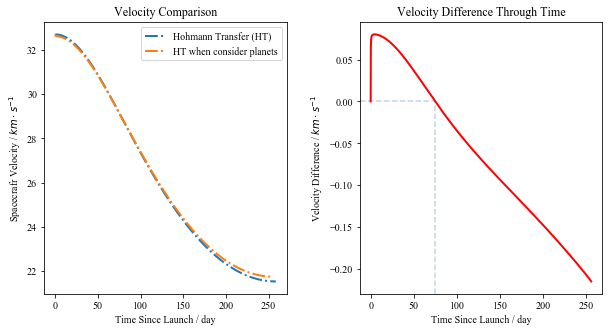

In [5]:
'''

Since the data points of these two models are different, we first cross-match the closest time
points in these two orbit, and compare the two models' velocity at different epoch.

'''
from astropy import constants as const
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax1=ax[0]

indx = results[1]>0
indx1 = results1[1]>0

x,y,z = results[:3,indx]
vx,vy,vz = results[3:,indx]
v = (vx**2+vy**2+vz**2)**(0.5)
t1 = time[indx]

x1,y1,z1 = results1[:3,indx1]
vx1,vy1,vz1 = results1[3:,indx1]
v1 = (vx1**2+vy1**2+vz1**2)**(0.5)
t2 = time1[indx1]

#plot the velocity v.s. time

T0 = (get_T(1.*u.AU,const.GM_sun)/(2*np.pi)).to('day')
v0 = (get_v(1.*u.AU)).to('km/s')
ax1.plot(time[indx]*T0,v*v0,linewidth=2,linestyle='-.',label='Hohmann Transfer (HT)')
ax1.plot(time1[indx1]*T0,v1*v0,linewidth=2,linestyle='-.',label='HT when consider planets')
ax1.set_title('Velocity Comparison')
ax1.set_xlabel('Time Since Launch / day')
ax1.set_ylabel('Spacecrafr Velocity / $km\cdot s^{-1}$')
ax1.legend()

#plot the velocity-difference v.s. time

ax2 = ax[1]
indx_time = (t2==0)

for i in range(0,len(t1)):
    tmp = np.array([x-t1[i] for x in t2])
    a = np.isclose(tmp,0)
    indx_time += a

ax2.plot(t1[:indx_time.sum()]*T0,(v[:indx_time.sum()]-v1[indx_time])*v0,linewidth=2,linestyle='-',c='r')  
ax2.axhline(y=0,xmin=0,xmax=0.31,linestyle='--',alpha=0.3)
ax2.axvline(x=75,ymin=0,ymax=0.71,linestyle='--',alpha=0.3)
ax2.set_title('Velocity Difference Through Time')
ax2.set_xlabel('Time Since Launch / day')
ax2.set_ylabel('Velocity Difference / $km\cdot s^{-1}$')

fig.subplots_adjust(wspace = 0.3)

fig.savefig('velocity.pdf',dpi=300)

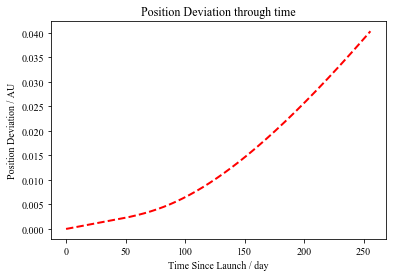

In [6]:
#plot the position deviation through time

dx = np.sqrt((x[:indx_time.sum()]-x1[indx_time])**2+
             (y[:indx_time.sum()]-y1[indx_time])**2+
             (z[:indx_time.sum()]-z1[indx_time])**2)

plt.plot(t1[:indx_time.sum()]*T0,dx,linewidth=2,linestyle='--',c='r')  
plt.title('Position Deviation through time')
plt.xlabel('Time Since Launch / day')
plt.ylabel('Position Deviation / AU')
plt.savefig('position_deviation.pdf', dpi=300)